In [21]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from time import time
from PIL import Image

In [4]:
from google.colab import files
uploated = files.upload()

Saving data.csv to data.csv


In [5]:
from google.colab import files
uploated = files.upload()

Saving spam.csv to spam.csv


In [7]:
df_ins = pd.read_csv("data.csv")
cat_df = df_ins[['gender', 'diabetic', 'children', 'smoker', 'region']]
num_df = df_ins[['age', 'bmi', 'bloodpressure', 'claim']]
## label encoding 
le = LabelEncoder ()

#select ctegorical columns 
cat_df = df_ins.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df_ins[i])

#joining the data to the numeric data
num_df = df_ins.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)

<ipython-input-7-22ea4748f9a2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df[i] = le.fit_transform(df_ins[i])


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


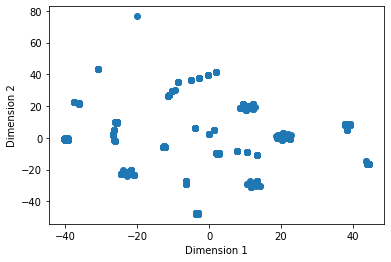

In [8]:
X = main_df[['gender', 'diabetic', 'children', 'smoker',]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X_reduced)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [9]:
from google.colab import files
uploated = files.upload()

Saving photo.jpg to photo.jpg


In [24]:
image = Image.open('photo.jpg')
image = np.array(image, dtype=np.float64) / 255
image

array([[[0.49803922, 0.52156863, 0.56862745],
        [0.69411765, 0.71764706, 0.76470588],
        [0.6       , 0.62352941, 0.67843137],
        ...,
        [0.49803922, 0.53333333, 0.64705882],
        [0.47843137, 0.51372549, 0.62745098],
        [0.36862745, 0.40784314, 0.51372549]],

       [[0.54901961, 0.57254902, 0.61960784],
        [0.63529412, 0.65882353, 0.70588235],
        [0.57647059, 0.6       , 0.65490196],
        ...,
        [0.42352941, 0.45882353, 0.57254902],
        [0.43137255, 0.46666667, 0.58039216],
        [0.36470588, 0.40392157, 0.50980392]],

       [[0.46666667, 0.49019608, 0.5372549 ],
        [0.54117647, 0.56470588, 0.61176471],
        [0.58431373, 0.60784314, 0.6627451 ],
        ...,
        [0.40392157, 0.43921569, 0.55294118],
        [0.40392157, 0.43921569, 0.55294118],
        [0.36862745, 0.40392157, 0.51764706]],

       ...,

       [[0.06666667, 0.16078431, 0.10980392],
        [0.06666667, 0.16078431, 0.10980392],
        [0.06666667, 0

In [25]:
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))
assert d == 3
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

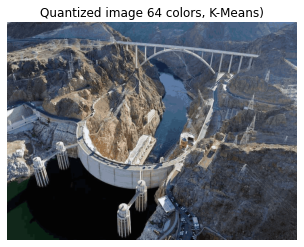

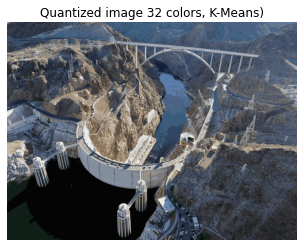

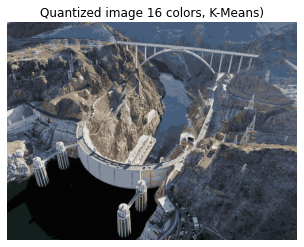

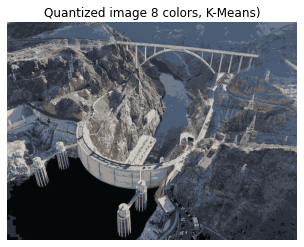

In [30]:
#Should check for each depth manually, or will get kernel error
#64
kmeans64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
kmeans32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
kmeans16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
labels64 = kmeans64.predict(image_array)
labels32 = kmeans32.predict(image_array)
labels16 = kmeans16.predict(image_array)
labels8 = kmeans8.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Quantized image 64 colors, K-Means)")
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title("Quantized image 32 colors, K-Means)")
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title("Quantized image 16 colors, K-Means)")
plt.imshow(recreate_image(kmeans16.cluster_centers_, labels16, w, h))
plt.figure(4)
plt.clf()
plt.axis("off")
plt.title("Quantized image 8 colors, K-Means)")
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, w, h))


In [11]:
sms_spam_collection = pd.read_csv('spam.csv', sep='\t', header=None, names=['Label', 'SMS'], encoding='windows-1252')
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.replace('\W', ' ')
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.lower()
sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.split()

<ipython-input-11-b12e315df413>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sms_spam_collection['SMS'] = sms_spam_collection['SMS'].str.replace('\W', ' ')


In [12]:
ham_texts = sms_spam_collection[sms_spam_collection['Label'] == 'ham']['SMS'].tolist()
spam_texts = sms_spam_collection[sms_spam_collection['Label'] == 'spam']['SMS'].tolist()

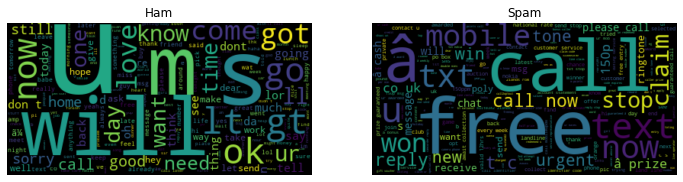

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
ham_texts_array = []
for string_list in ham_texts:
  combined_string = " ".join(string_list)
  ham_texts_array.append(combined_string)
spam_texts_array = []
for string_list in spam_texts:
  combined_string = " ".join(string_list)
  spam_texts_array.append(combined_string)
ham_wordcloud = WordCloud().generate(' '.join(ham_texts_array))
print(ham_wordcloud)
spam_wordcloud = WordCloud().generate(' '.join(spam_texts_array))
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(ham_wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title('Ham')
ax[1].imshow(spam_wordcloud, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title('Spam')
plt.show()